In [1]:
#Importing packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.image as mpimg
import keras
import pickle
import cv2
import random
import string

In [2]:
#Defining variables
BOLD = '\033[1m'
END_BOLD = '\033[0m'
user_folder = 'C:\\Users\\Priya\\DL_User_Images\\'
cur_dir = os.getcwd()
HEIGHT = 0
WIDTH = 0
class_mapping = {}
model = np.array([])
main_folder = ""

# Yoga Guru

In [3]:
#Function to generate unique filenames for user images
def enter_unique_name():
    exiting_file_names=[]
    for root, dirs, files in os.walk(user_folder):
        for f in files:
            exiting_file_names.append(f[:10])
    random_letters_list = random.choices(string.ascii_lowercase, k=10)
    random_letters_string = ''.join(random_letters_list)
    if random_letters_string in exiting_file_names:
        print("Name taken. Enter a different name")
        enter_unique_name()
    else:
        return random_letters_string

    return img

#Function to display the captured user images
def display_single_user_image(img_path):
    print("This is how you look")
    plt.imshow(mpimg.imread(img_path))
    plt.show()

In [4]:
# Function to preprocess the user image for the model trained with 5 asanas
def create_single_user_data_5_asanas(image_path):
    global HEIGHT, WIDTH
    img=cv2.imread(image_path)
    img = cv2.resize(img, (HEIGHT,WIDTH))
    img = np.array(img).astype('float32')
    img = img/255
    return img


In [5]:
# Function to preprocess the user image for the model trained with 25 asanas
def create_single_user_data(image_path):
    global HEIGHT, WIDTH
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (HEIGHT,WIDTH))
    img = np.array(img).astype('float32')
    img = img/255
    return img

#Function to capture user images, and call functions which prepocess them, and predict the asana
def individual_attempts(name,asana,attempts,yoga_num):
    cam = cv2.VideoCapture(0)
    val, img = cam.read()
    image_path = user_folder+name +str(attempts)+'.png'
    cv2.imwrite(image_path, img)
    if yoga_num==1:
        user_x = create_single_user_data(image_path)
    elif yoga_num==2:
        user_x = create_single_user_data_5_asanas(image_path)
    
    del(cam)

    display_single_user_image(image_path)
    predict_user_asana(user_x,asana,yoga_num)

# Function to display some reference asana images
def display_asana_samples(asana):
    global main_folder
    asana_file_names=[]
    asana_folder = main_folder+str.strip(asana)
    for root, dirs, files in os.walk(asana_folder):
        for f in files:  
            asana_file_names.append(f)
    asana_file_names=random.choices(asana_file_names,k=4)
    plt.figure(figsize=(10,10))
    for i in range(len(asana_file_names)):
        plt.subplot(2,2,i+1)
        plt.imshow(mpimg.imread(main_folder+str.strip(asana)+"\\"+asana_file_names[i]))
    plt.show()

#Function to predict which asana the user is performing
def predict_user_asana(user_x,asana,yoga_num):
    global HEIGHT, WIDTH, class_mapping, model
    if yoga_num==1:
        pred = model.predict(user_x.reshape(1,WIDTH, HEIGHT))
    elif yoga_num==2:
        pred = model.predict(user_x.reshape(1,WIDTH, HEIGHT,3))
        
    act_class = class_mapping[asana]
    #act_class = list(class_mapping.keys())[list(class_mapping.values()).index(act_val)]

    print(BOLD,"Lets see if you are doing",asana,"....\n",END_BOLD)

    pred_val = pred.argmax()
    pred_class = list(class_mapping.keys())[list(class_mapping.values()).index(pred_val)]
    if act_class==pred_val:
        print(BOLD,"Great job! Model says you are doing it the right way!",END_BOLD)
    else:
        print(BOLD,"Sorry..the program says you are doing",pred_class,"instead...Keep trying!...",END_BOLD)
        if input(BOLD+"Want to look at some sample poses?[y/n]"+END_BOLD)=='y':
            print(BOLD,"Here are some of the sample images for",asana,END_BOLD)
            display_asana_samples(asana) 
            
        else:
            print(BOLD,"Uhm..Okay...do it your way...I guess...",END_BOLD)
        
    

In [6]:
# Yoga Guru Function that gets user's inputs and guides them to perfect their asana 
def call_yoga_guru():
    global HEIGHT, WIDTH, class_mapping, model,main_folder
    print("""Option 1 - 25 Asanas
Option 2 - 5 Asanas""")
    yoga_num = int(input(BOLD+"Pick an option"+END_BOLD))
    print(BOLD,"Hey there!!! Welcome to your FREE YOGA CLASS!!!")
    print("Here are the list of asanas we can help you with:",END_BOLD)
    if yoga_num==1:
        print("You have selected 25 Asanas")
        model = keras.models.load_model('cnn_yoga_basics_model_shuffled')
        with open('saved_dictionary_25_yoga.pkl', 'rb') as f:
            class_mapping = pickle.load(f)
        main_folder = cur_dir + "\\yoga_basics_data\\dataset\\"
        WIDTH=100
        HEIGHT=150
    elif  yoga_num==2:
        print("You have selected 5 Asanas")
        model = keras.models.load_model('cnn_yoga_5_model')
        with open('saved_dictionary_5_yoga.pkl', 'rb') as f:
            class_mapping = pickle.load(f)
        main_folder = 'C:\\Users\\Priya\\Yoga_5_asana\\DATASET\\TRAIN\\'
        WIDTH=128
        HEIGHT=128
    else:
        print("Enter a valid option")
    
    name=enter_unique_name()

    for i in list(class_mapping.keys()):
        print(i)
    asana = input(BOLD+"Tell us which Yogasana you are attempting\n"+END_BOLD)
    keep_taking_pics = True
    attempts=1
    if keep_taking_pics:
        print(BOLD,"Attempt ",attempts)
        individual_attempts(name,asana,attempts,yoga_num)

        while input(BOLD+"Keep attempting? [y/n]"+END_BOLD)=='y':
            attempts+=1
            individual_attempts(name,asana,attempts,yoga_num)
        print(BOLD,"Sorry to see you go :(")
        print("Hope you mastered the",asana,"!",END_BOLD)
        keep_taking_pics=False

Option 1 - 25 Asanas
Option 2 - 5 Asanas
Pick an option2
 Hey there!!! Welcome to your FREE YOGA CLASS!!!
Here are the list of asanas we can help you with: 
You have selected 5 Asanas
downdog
goddess
plank
tree
warrior2
Tell us which Yogasana you are attempting
warrior2
 Attempt  1
This is how you look


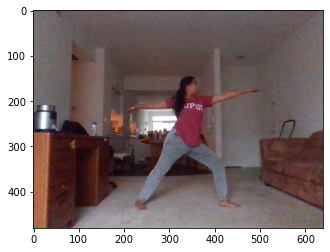

1/1 [==============================] - 0s 157ms/step
 Lets see if you are doing warrior2 ....
 
 Great job! Model says you are doing it the right way! 
Keep attempting? [y/n]n
 Sorry to see you go :(
Hope you mastered the warrior2 ! 


In [7]:
call_yoga_guru()

In [8]:
#Function to delete the captures user images
def delete_user_images():
    for root, dirs, files in os.walk(user_folder):
        for f in files: 
            img_path =user_folder+"\\"+f
            os.remove(img_path)
#delete_user_images()